## Evaluation of the datasets with CICFlowmeter

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir=root_dir+'proyecto_grado_redes/evaluation_datasets/'

Mounted at /content/gdrive


In [2]:
import pandas as pd

## Reading the dataset

In [3]:
df_isot_normal1_org=pd.read_csv(base_dir+"csv_original/isot_dns_application_2017_0_pcap_Flow.csv")
df_isot_normal1_org['Label'] = df_isot_normal1_org['Label'].map({'NeedManualLabel': 'Normal'})

In [4]:
df_isot_normal2_org=pd.read_csv(base_dir+"csv_original/isot_dns_application_2017_1_pcap_Flow.csv")
df_isot_normal2_org['Label'] = df_isot_normal2_org['Label'].map({'NeedManualLabel': 'Normal'})

In [5]:
df_isot_attack1_org=pd.read_csv(base_dir+"csv_original/isot_botnet_init1_pcap_Flow.csv")
df_isot_attack1_org['Label'] = df_isot_attack1_org['Label'].map({'NeedManualLabel': 'Attack'})

In [6]:
df_isot_attack2_org=pd.read_csv(base_dir+"csv_original/isot_botnet_init2_pcap_Flow.csv")
df_isot_attack2_org['Label'] = df_isot_attack2_org['Label'].map({'NeedManualLabel': 'Attack'})

In [7]:
df_isot_attack3_org=pd.read_csv(base_dir+"csv_original/isot_botnet_init3_pcap_Flow.csv")
df_isot_attack3_org['Label'] = df_isot_attack3_org['Label'].map({'NeedManualLabel': 'Attack'})

In [8]:
df_isot_normal1_srg=pd.read_csv(base_dir+"csv_modified/isot_dns_application_2017_0_pcap_Flow.csv")
df_isot_normal1_srg['Label'] = df_isot_normal1_srg['Label'].map({'ManualLabel': 'Normal'})

In [9]:
df_isot_normal2_srg=pd.read_csv(base_dir+"csv_modified/isot_dns_application_2017_1_pcap_Flow.csv")
df_isot_normal2_srg['Label'] = df_isot_normal2_srg['Label'].map({'ManualLabel': 'Normal'})

In [10]:
df_isot_attack1_srg=pd.read_csv(base_dir+"csv_modified/isot_botnet_init1_pcap_Flow.csv")
df_isot_attack1_srg['Label'] = df_isot_attack1_srg['Label'].map({'ManualLabel': 'Attack'})

In [11]:
df_isot_attack2_srg=pd.read_csv(base_dir+"csv_modified/isot_botnet_init2_pcap_Flow.csv")
df_isot_attack2_srg['Label'] = df_isot_attack2_srg['Label'].map({'ManualLabel': 'Attack'})

In [12]:
df_isot_attack3_srg=pd.read_csv(base_dir+"csv_modified/isot_botnet_init3_pcap_Flow.csv")
df_isot_attack3_srg['Label'] = df_isot_attack3_srg['Label'].map({'ManualLabel': 'Attack'})

## ML

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [14]:
def get_score (model,x_test, y_test):
    score = model.score(x_test, y_test)
    print (f'{model}\nscore: {score}')

In [15]:
def evaluate_model (model,x_test,y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)    
    print(classification_report(y_test,y_predicted))
    get_accuracy(cm)
    plt.figure(figsize=(18,12))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted', fontsize=24)
    plt.ylabel('Truth',fontsize=24)

In [16]:
def get_accuracy(cm):
    tn=cm[0][0]
    tp=cm[1][1]
    fn=cm[0][1]
    fp=cm[1][0]
    fpr=fp/(fp+tn)
    fnr=fn/(fn+tp)
    far=(fpr+fnr)/2
    acc=(tp+tn)/(tp+tn+fp+fn)
    print(f'False positive rate FPR: {fpr}\nFalse negative rate FNR: {fnr}\nFAR: {far}\nAccuracy: {acc}')

## Original Evaluation

In [17]:
df_org=pd.concat([df_isot_normal1_org,df_isot_normal2_org,df_isot_attack1_org,df_isot_attack2_org,df_isot_attack3_org],axis='index')
df_org = df_org.reset_index()

In [18]:
df_org=df_org.sample(frac=1).reset_index(drop=True)
#df_org = shuffle(df_org)
df_org.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_org.replace({'Label':traffic},inplace=True)

In [19]:
df_org.replace([np.inf, -np.inf], np.nan, inplace=True)
df_org=df_org.apply(lambda x: x.fillna(x.mean()),axis=0)

In [20]:
input = df_org.drop(columns=['Label'])
target = df_org['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 0.9579374352417275
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     22902
           1       0.98      0.97      0.97    113181

    accuracy                           0.96    136083
   macro avg       0.92      0.93      0.93    136083
weighted avg       0.96      0.96      0.96    136083

False positive rate FPR: 0.13301145103401127
False negative rate FNR: 0.02317201963098714
FAR: 0.078

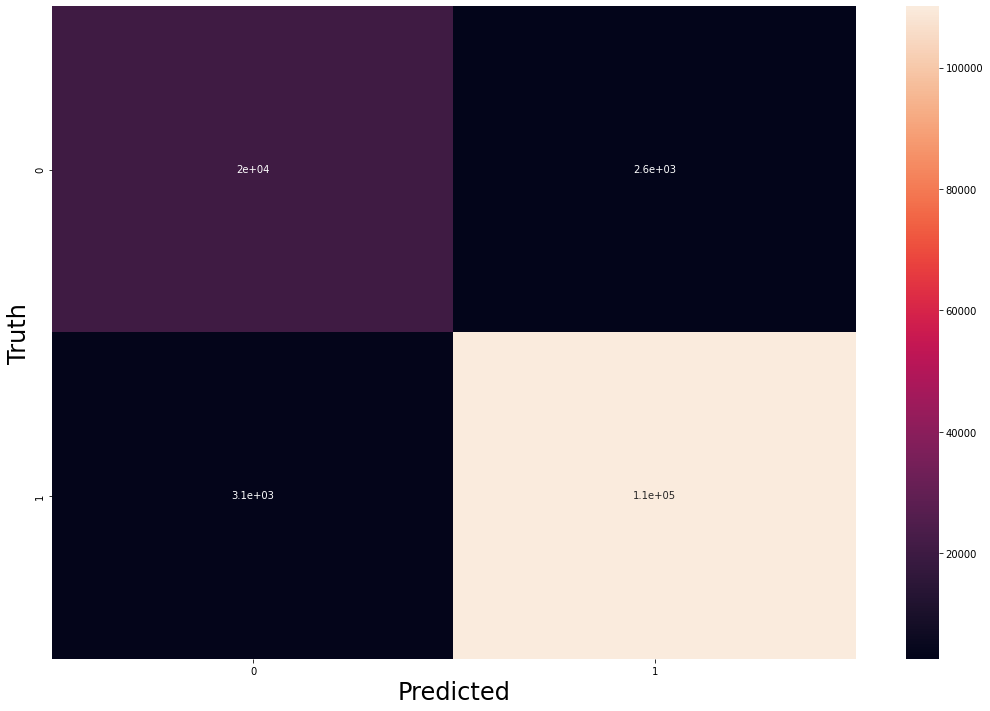

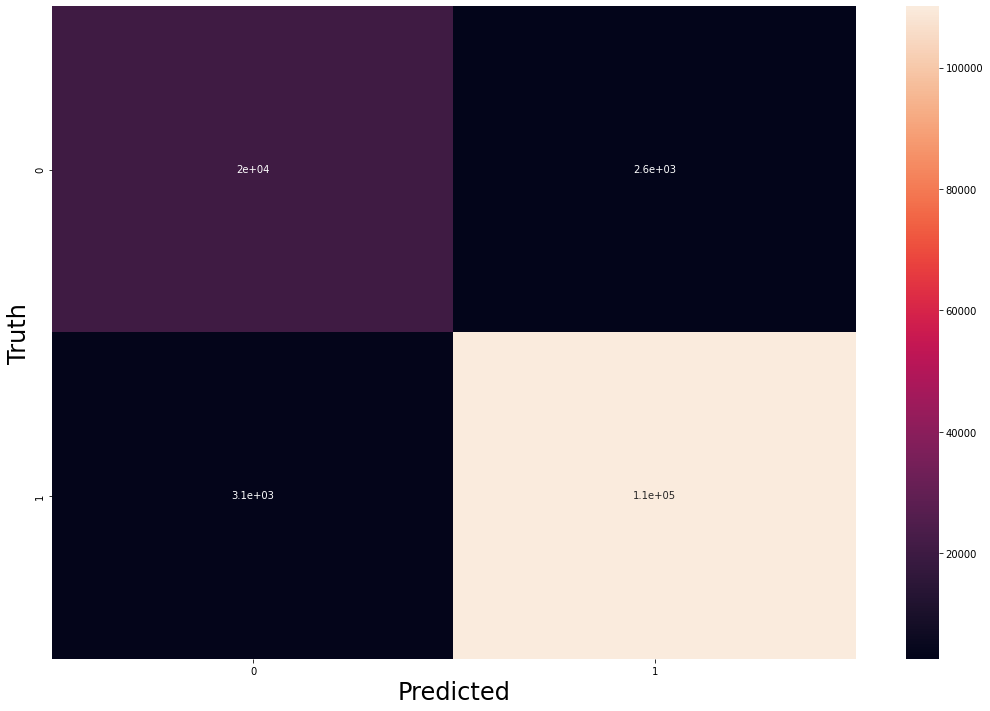

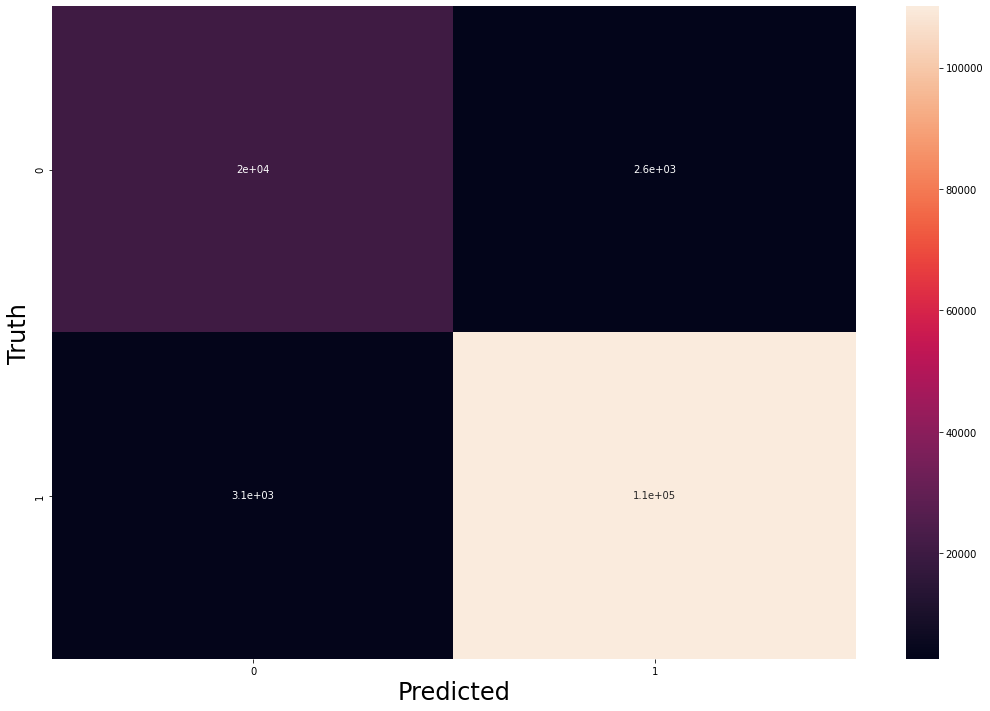

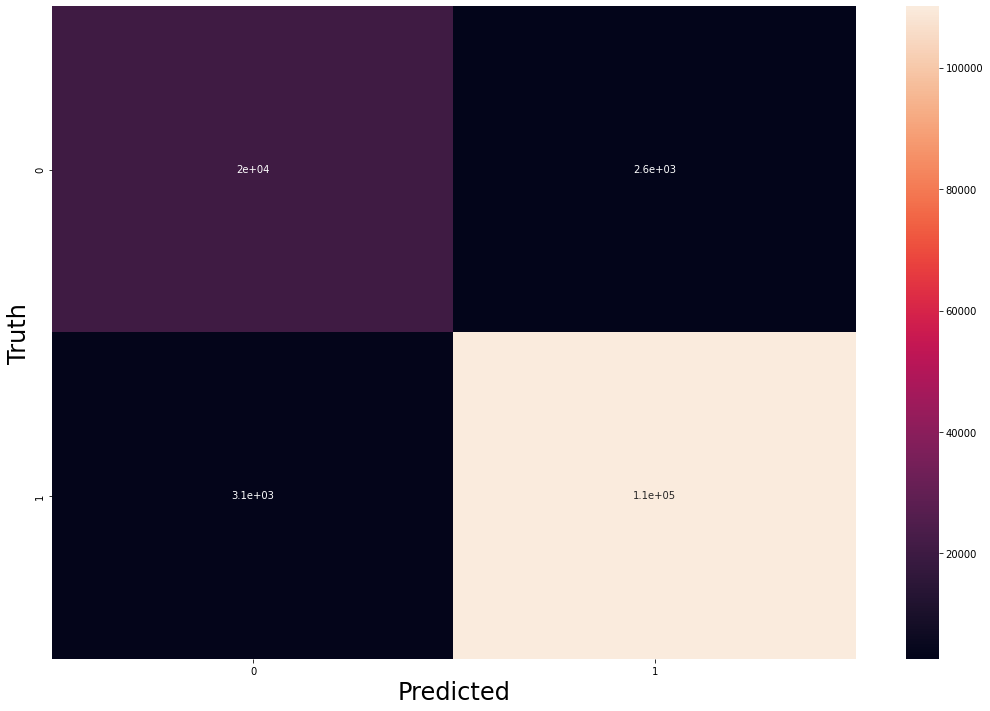

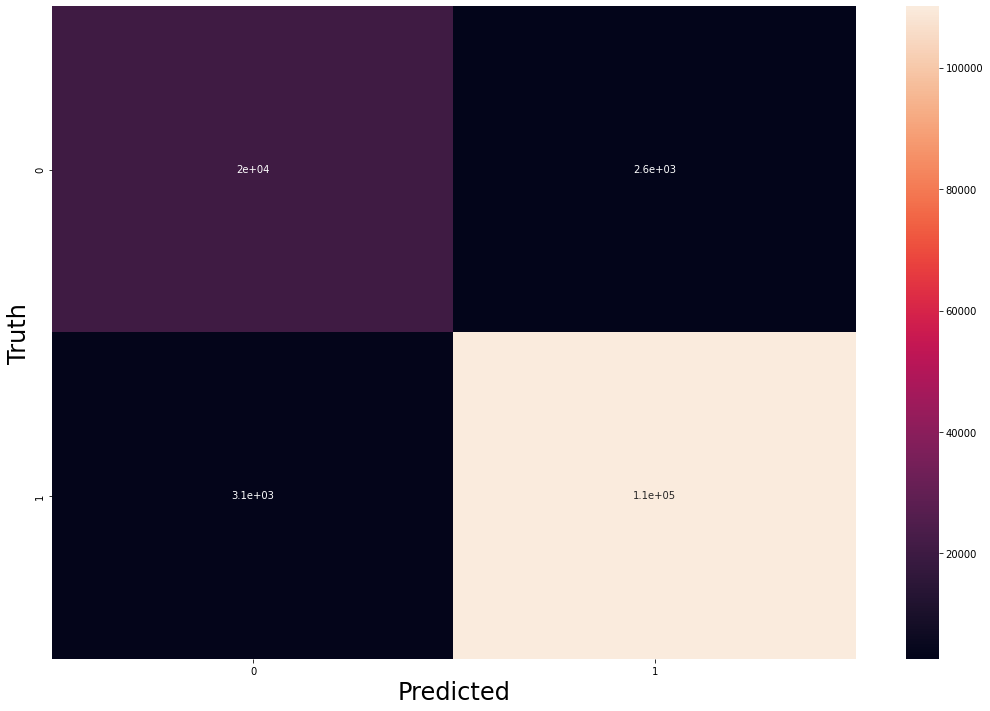

In [ ]:
n=[100,200,300,400,500]
for it in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[it])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

              precision    recall  f1-score   support

           0       0.87      0.20      0.32     22727
           1       0.86      0.99      0.92    113356

    accuracy                           0.86    136083
   macro avg       0.86      0.60      0.62    136083
weighted avg       0.86      0.86      0.82    136083

False positive rate FPR: 0.13224254090471607
False negative rate FNR: 0.1391953425829717
FAR: 0.13571894174384388
Accuracy: 0.8610700822292278


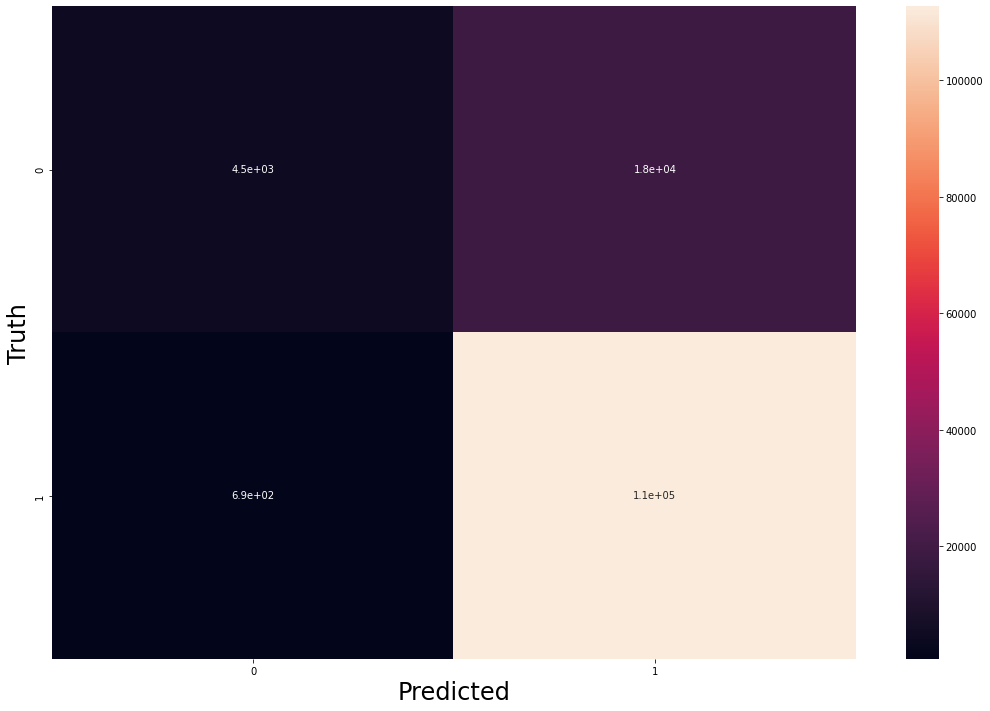

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### AdaBoost 

AdaBoostClassifier(n_estimators=500)
score: 0.9410359853912685
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     22705
           1       0.96      0.97      0.96    113378

    accuracy                           0.94    136083
   macro avg       0.90      0.89      0.89    136083
weighted avg       0.94      0.94      0.94    136083

False positive rate FPR: 0.16611325904025473
False negative rate FNR: 0.0383179372118705
FAR: 0.10221559812606261
Accuracy: 0.9410359853912685


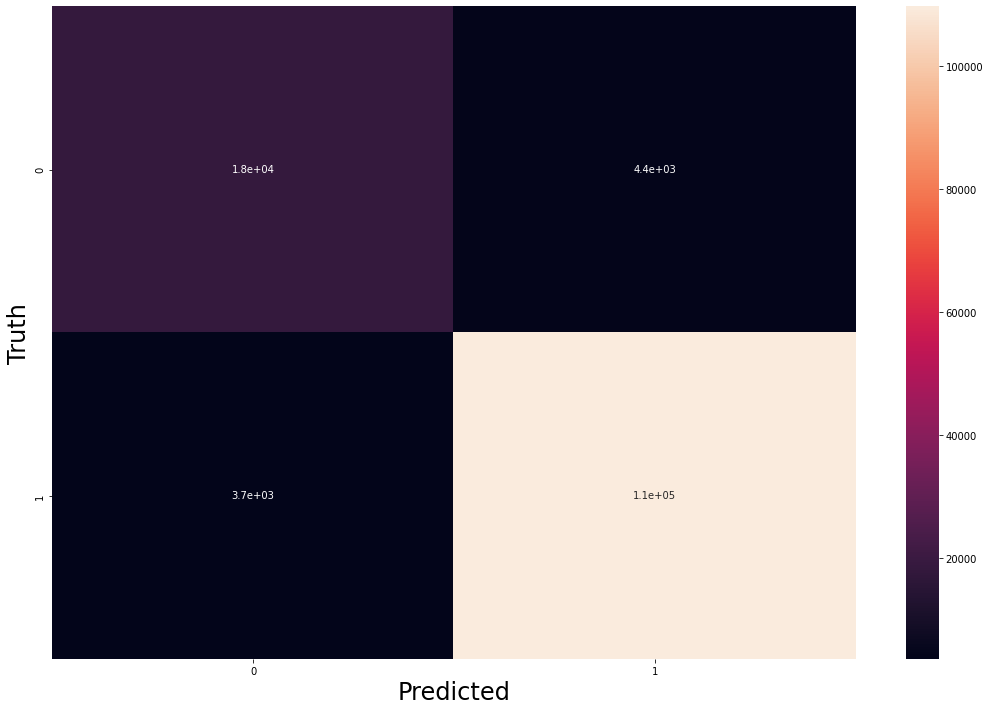

In [21]:
ab_model = AdaBoostClassifier(n_estimators=500)
ab_model.fit(x_train,y_train)
get_score(ab_model,x_test,y_test)
evaluate_model(ab_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
score: 0.8712991336169837
              precision    recall  f1-score   support

           0       0.69      0.43      0.53     22902
           1       0.89      0.96      0.93    113181

    accuracy                           0.87    136083
   macro avg       0.79      0.70      0.73    136083
weighted avg       0.86      0.87      0.86    136083

False positive rate FPR: 0.3127606338615513
False negative rate FNR: 0.10693947984715887
FAR: 0.2098500568543551
Accuracy: 0.8712991336169837


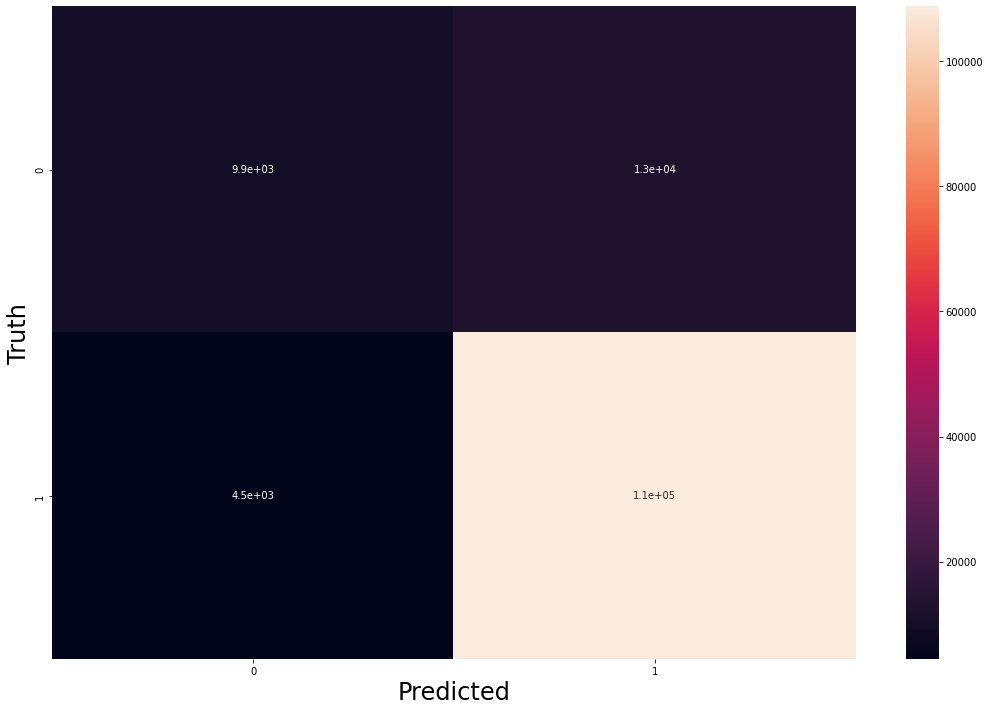

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
score: 0.9400292468566978
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     22902
           1       0.96      0.96      0.96    113181

    accuracy                           0.94    136083
   macro avg       0.89      0.89      0.89    136083
weighted avg       0.94      0.94      0.94    136083

False positive rate FPR: 0.17629232728710087
False negative rate FNR: 0.03659741955980726
FAR: 0.10644487342345407
Accuracy: 0.9400292468566978
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.9415577257996958
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     

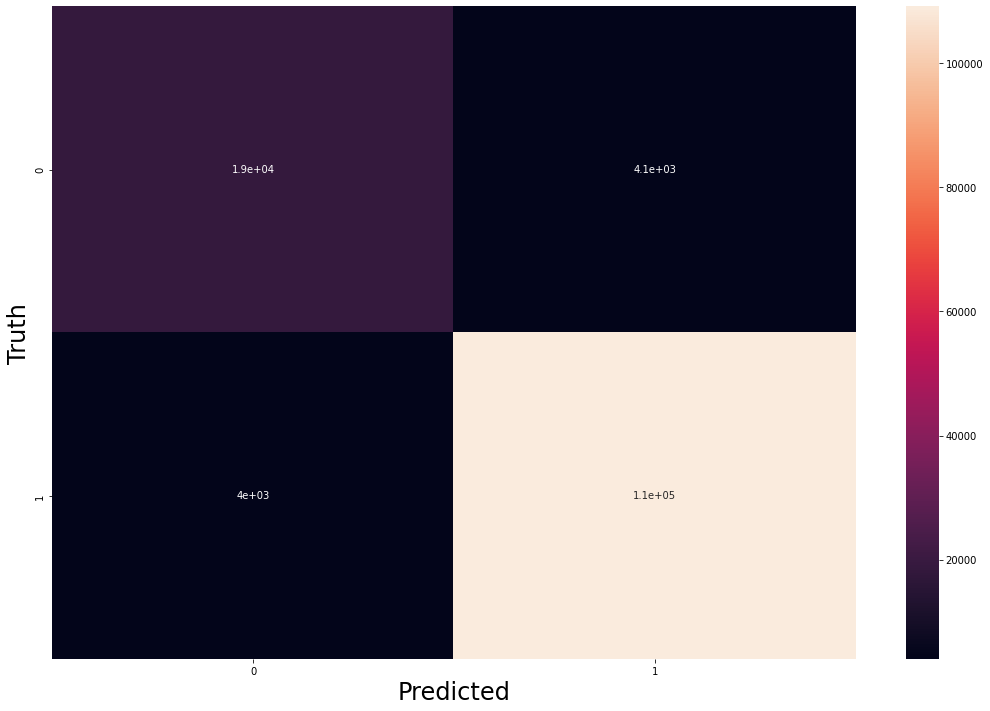

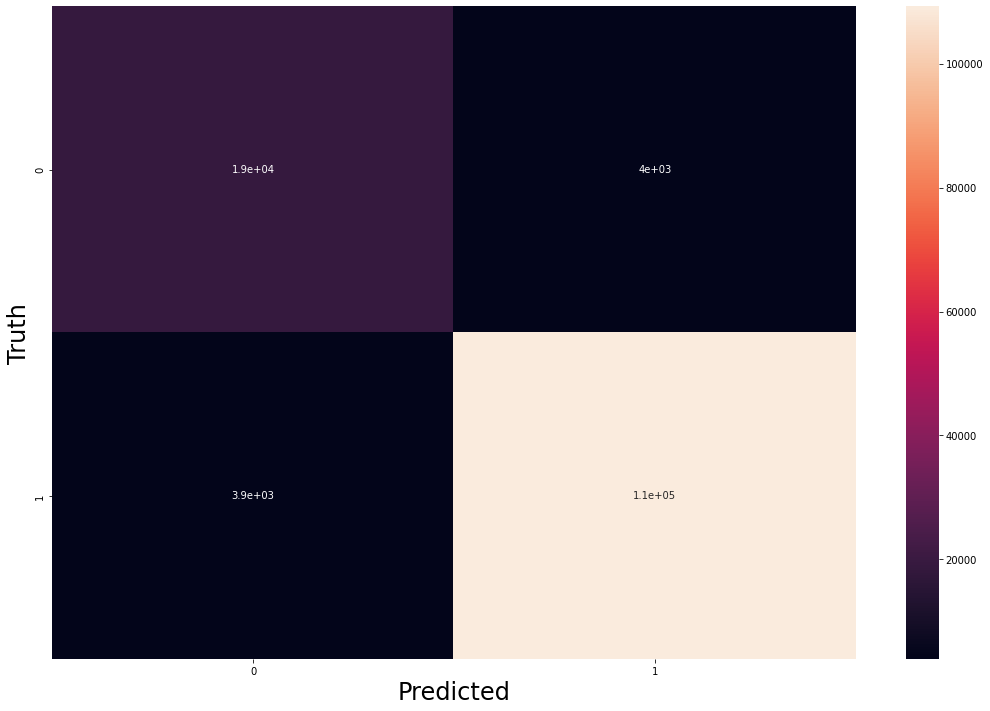

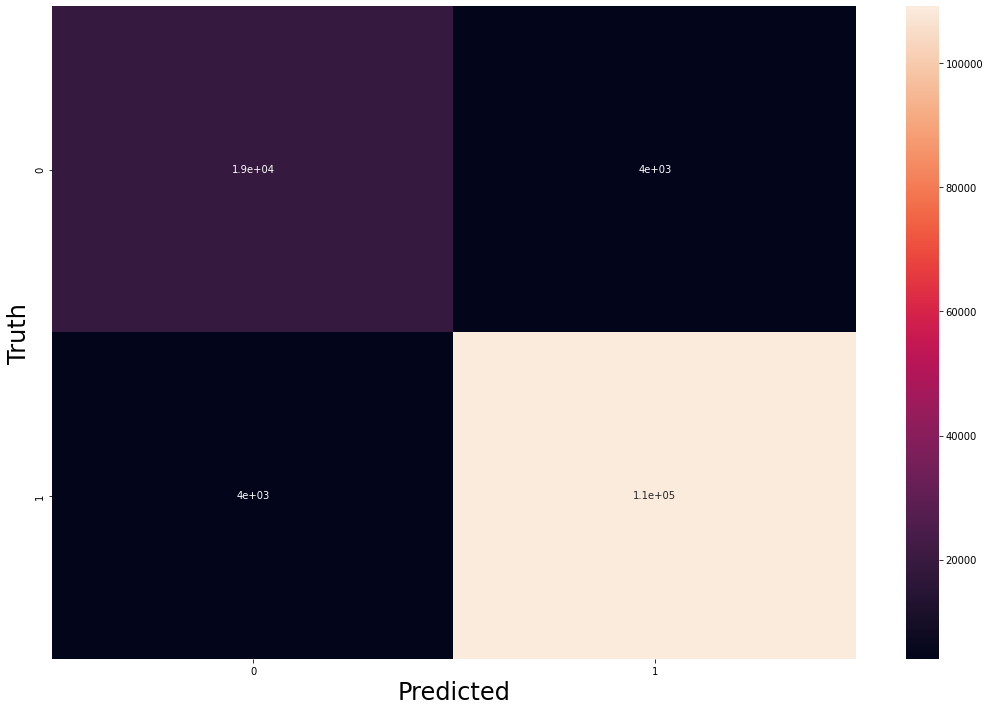

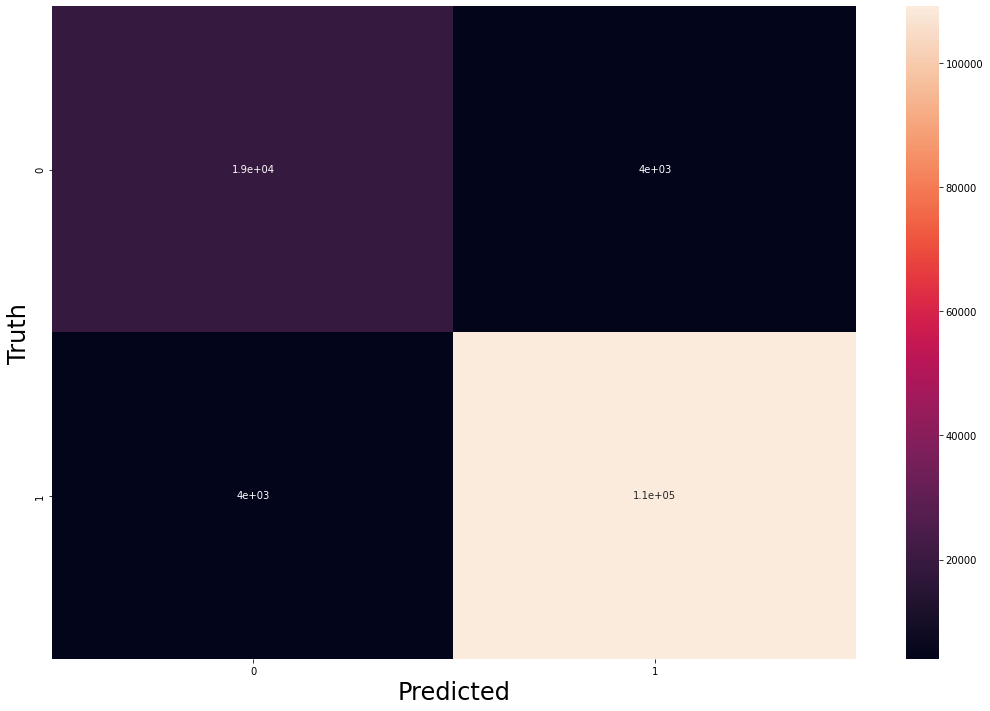

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.62      0.42      0.50     22902
           1       0.89      0.95      0.92    113181

    accuracy                           0.86    136083
   macro avg       0.76      0.68      0.71    136083
weighted avg       0.85      0.86      0.85    136083

False positive rate FPR: 0.3757816571130797
False negative rate FNR: 0.11031963621605057
FAR: 0.24305064666456513
Accuracy: 0.8597326631541045


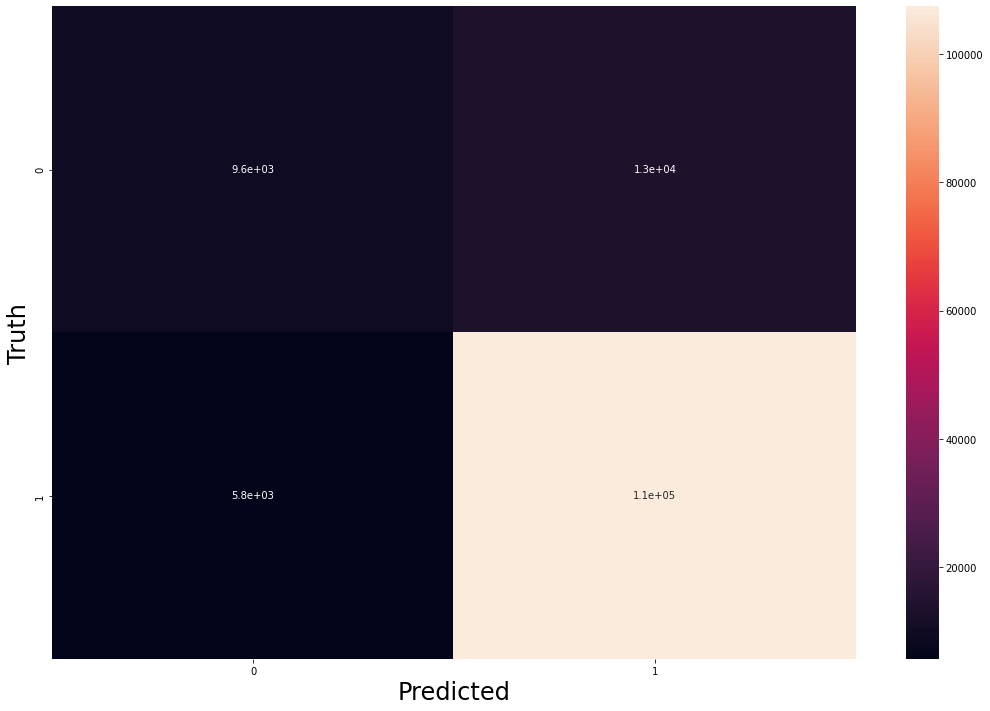

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
#get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [ ]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9577 (+/- 0.00)
[0.9569013  0.95757369 0.95792641 0.95767289 0.95841141]


In [ ]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9576 (+/- 0.00)
[0.95694539 0.95747448 0.9576288  0.95775005 0.95825709]


## Modified Evaluation

In [22]:
df_srg=pd.concat([df_isot_normal1_srg,df_isot_normal2_srg,df_isot_attack1_srg,df_isot_attack2_srg,df_isot_attack3_srg],axis='index')
df_srg = df_srg.reset_index()

In [23]:
df_srg=df_srg.sample(frac=1).reset_index(drop=True)
#df_srg = shuffle(df_srg)
df_srg.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_srg.replace({'Label':traffic},inplace=True)

In [24]:
df_srg.replace([np.inf, -np.inf], np.nan, inplace=True)
df_srg=df_srg.apply(lambda x: x.fillna(x.mean()),axis=0)

In [25]:
input = df_srg.drop(columns=['Label'])
target = df_srg['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 0.9581064497402321
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     22765
           1       0.98      0.97      0.97    113318

    accuracy                           0.96    136083
   macro avg       0.92      0.93      0.93    136083
weighted avg       0.96      0.96      0.96    136083

False positive rate FPR: 0.1305853827502598
False negative rate FNR: 0.02376379583491906
FAR: 0.0771

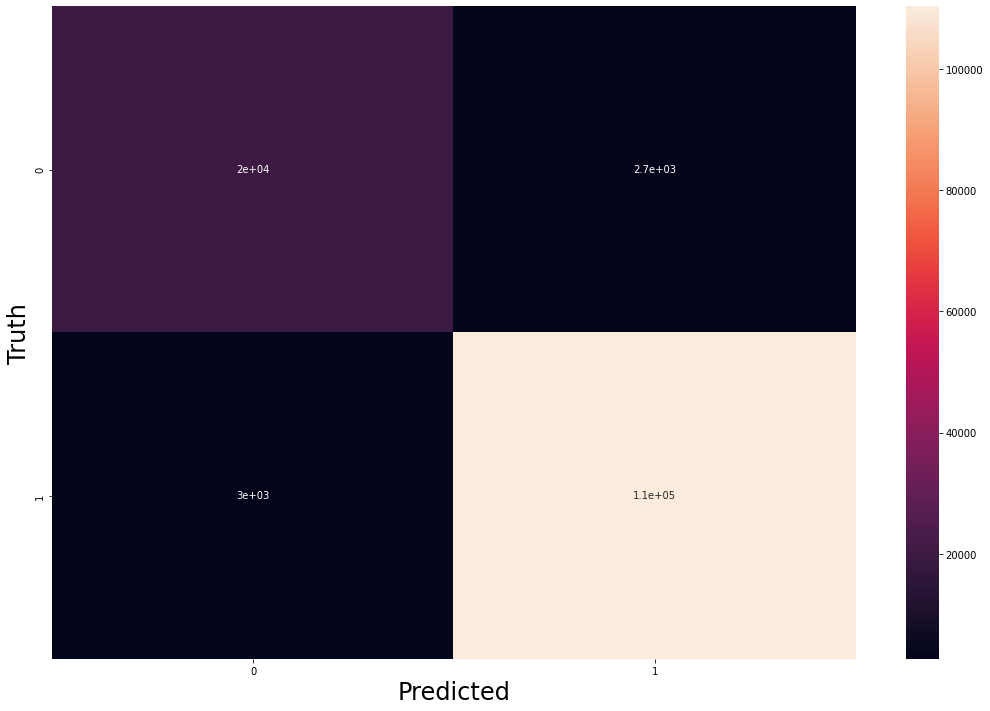

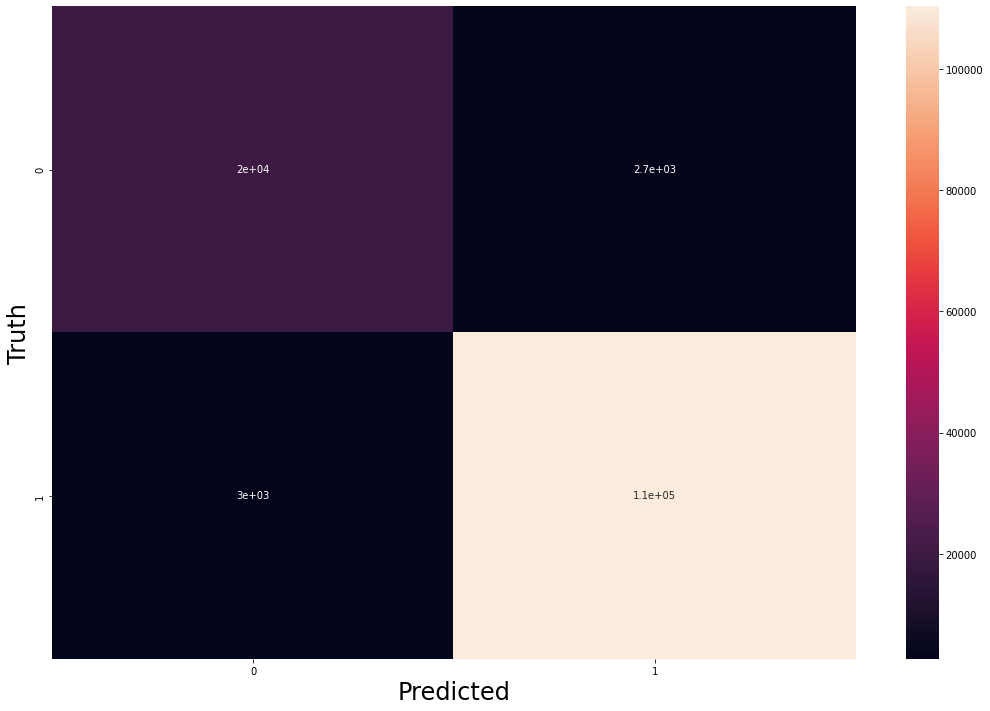

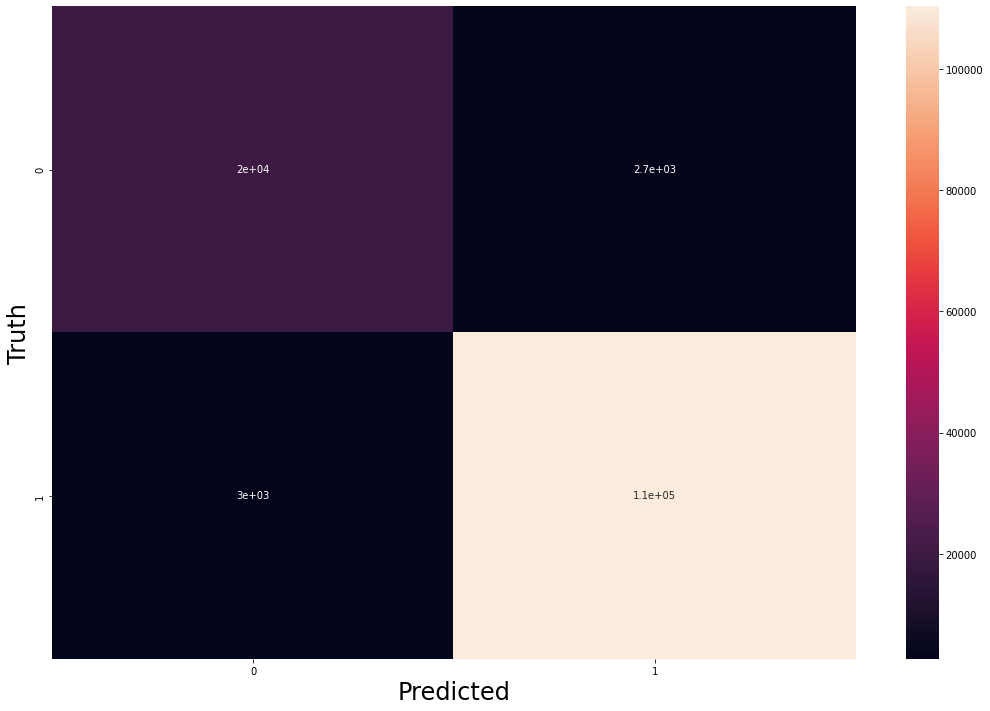

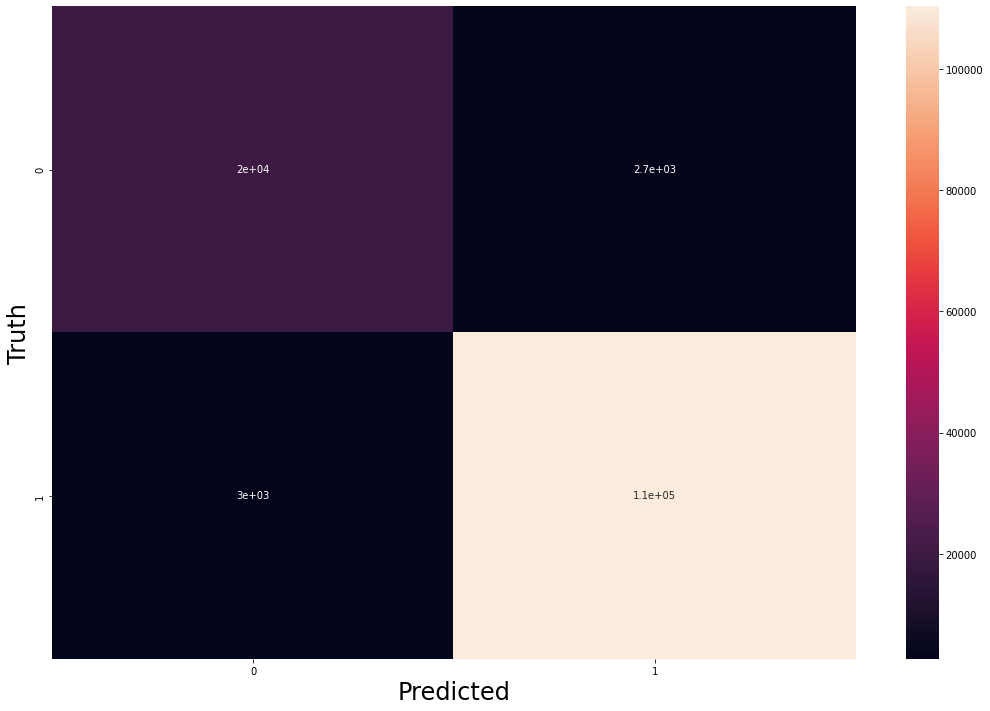

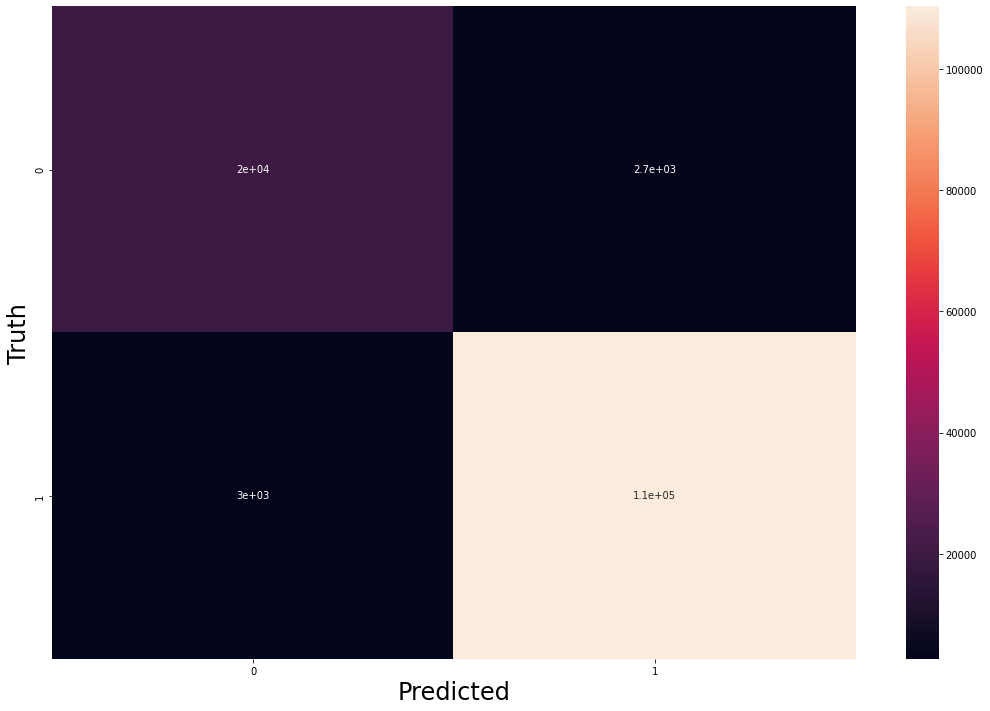

In [ ]:
n=[100,200,300,400,500]
for it in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[it])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

              precision    recall  f1-score   support

           0       0.87      0.20      0.32     22877
           1       0.86      0.99      0.92    113206

    accuracy                           0.86    136083
   macro avg       0.86      0.60      0.62    136083
weighted avg       0.86      0.86      0.82    136083

False positive rate FPR: 0.13194973343488195
False negative rate FNR: 0.1400126881243742
FAR: 0.13598121077962808
Accuracy: 0.860298494301272


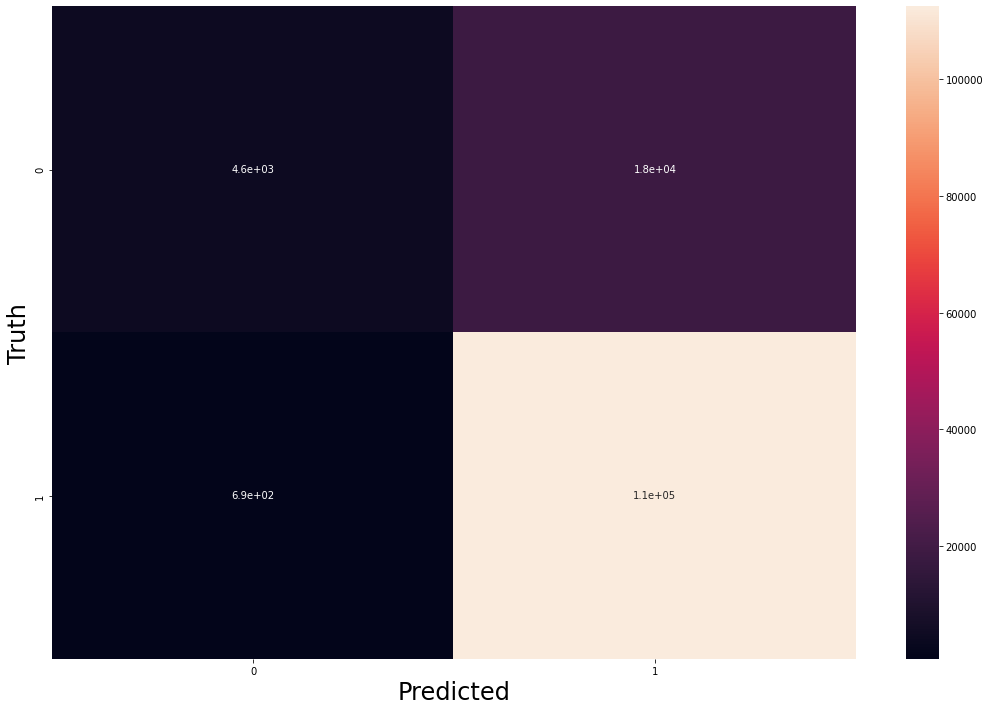

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### AdaBoost 

AdaBoostClassifier(n_estimators=500)
score: 0.9404921996134712
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     22934
           1       0.96      0.97      0.96    113149

    accuracy                           0.94    136083
   macro avg       0.90      0.89      0.89    136083
weighted avg       0.94      0.94      0.94    136083

False positive rate FPR: 0.1634606660012703
False negative rate FNR: 0.039415648757902856
FAR: 0.10143815737958657
Accuracy: 0.9404921996134712


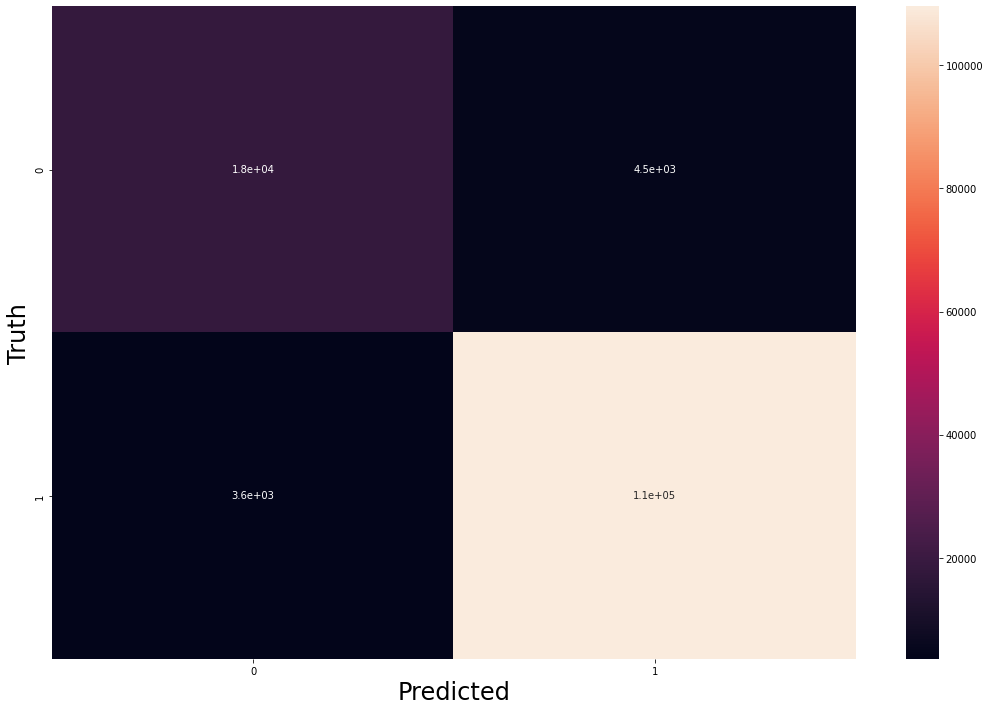

In [26]:
ab_model = AdaBoostClassifier(n_estimators=500)
ab_model.fit(x_train,y_train)
get_score(ab_model,x_test,y_test)
evaluate_model(ab_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
score: 0.8718061771124975
              precision    recall  f1-score   support

           0       0.68      0.44      0.54     22765
           1       0.90      0.96      0.93    113318

    accuracy                           0.87    136083
   macro avg       0.79      0.70      0.73    136083
weighted avg       0.86      0.87      0.86    136083

False positive rate FPR: 0.3210200511371282
False negative rate FNR: 0.10455284150435981
FAR: 0.212786446320744
Accuracy: 0.8718061771124975


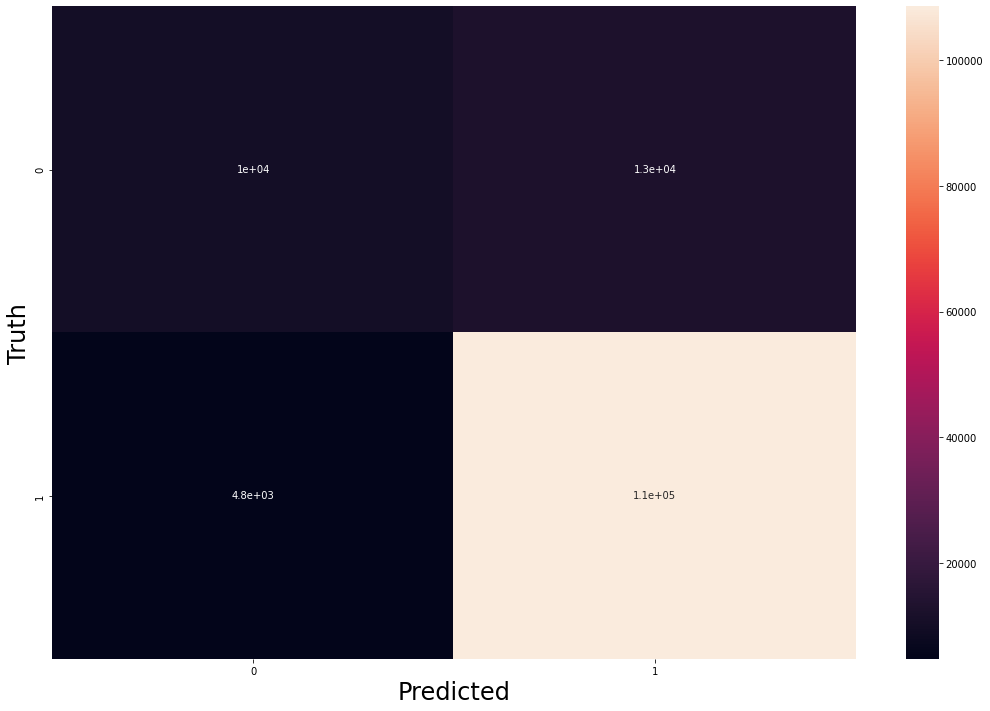

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
score: 0.9410727276735522
              precision    recall  f1-score   support

           0       0.83      0.82      0.82     22765
           1       0.96      0.97      0.96    113318

    accuracy                           0.94    136083
   macro avg       0.90      0.89      0.89    136083
weighted avg       0.94      0.94      0.94    136083

False positive rate FPR: 0.17324056018436448
False negative rate FNR: 0.03620539292981791
FAR: 0.1047229765570912
Accuracy: 0.9410727276735522
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.9423734044663918
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     2

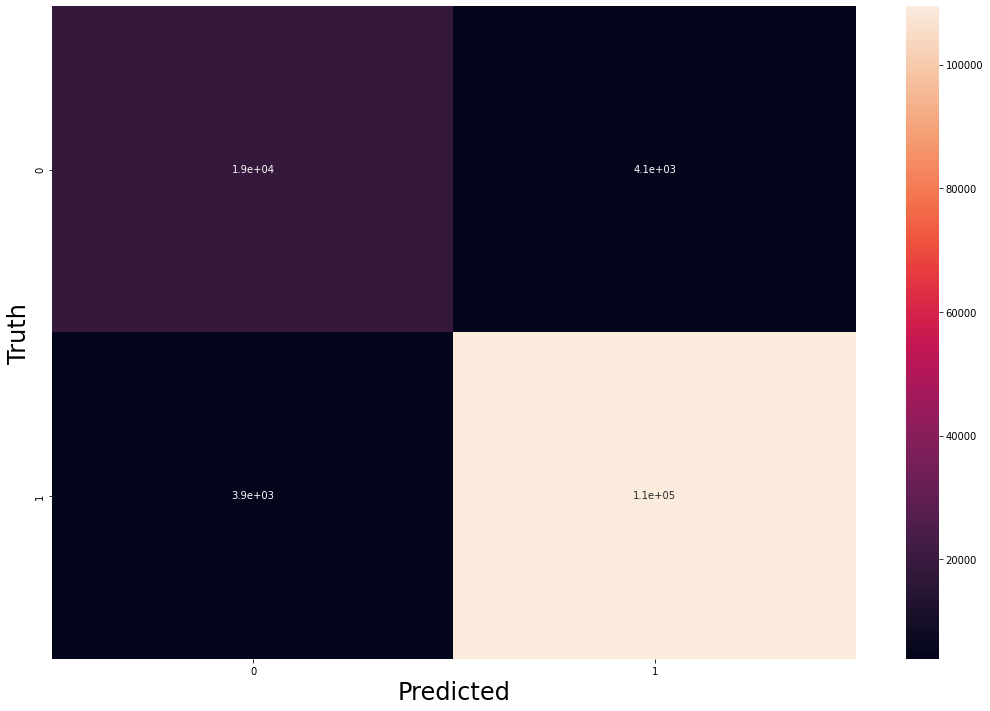

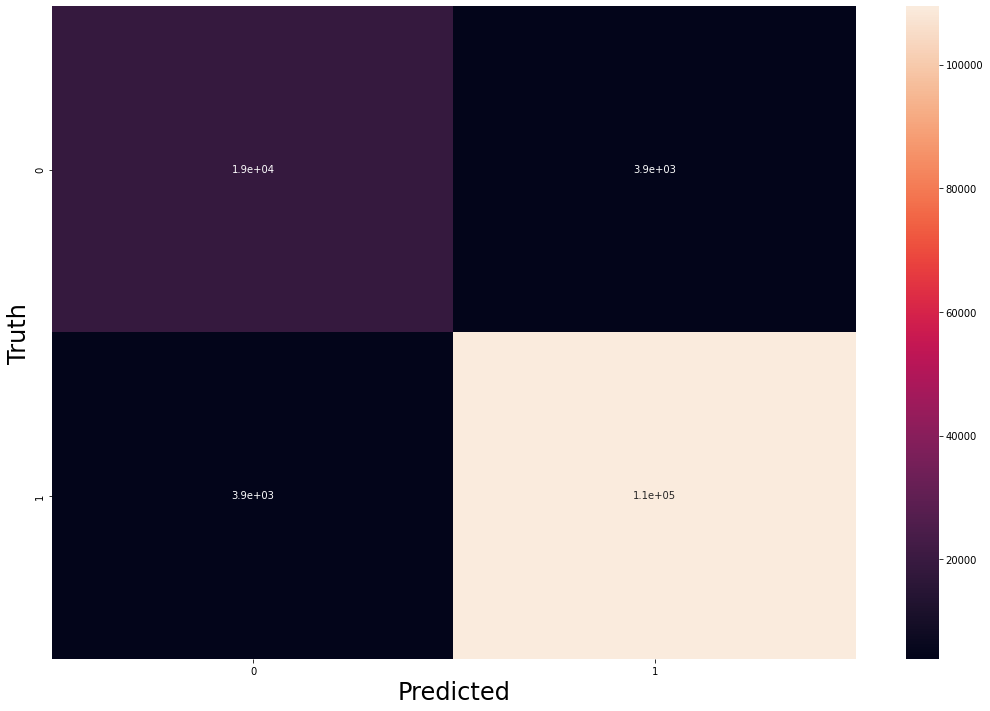

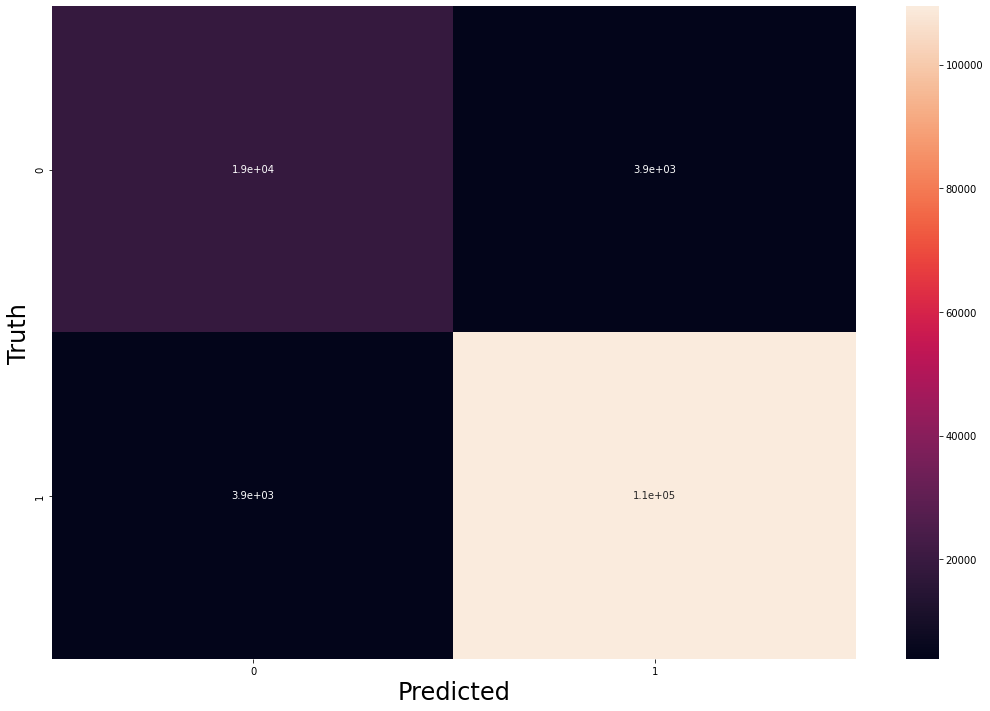

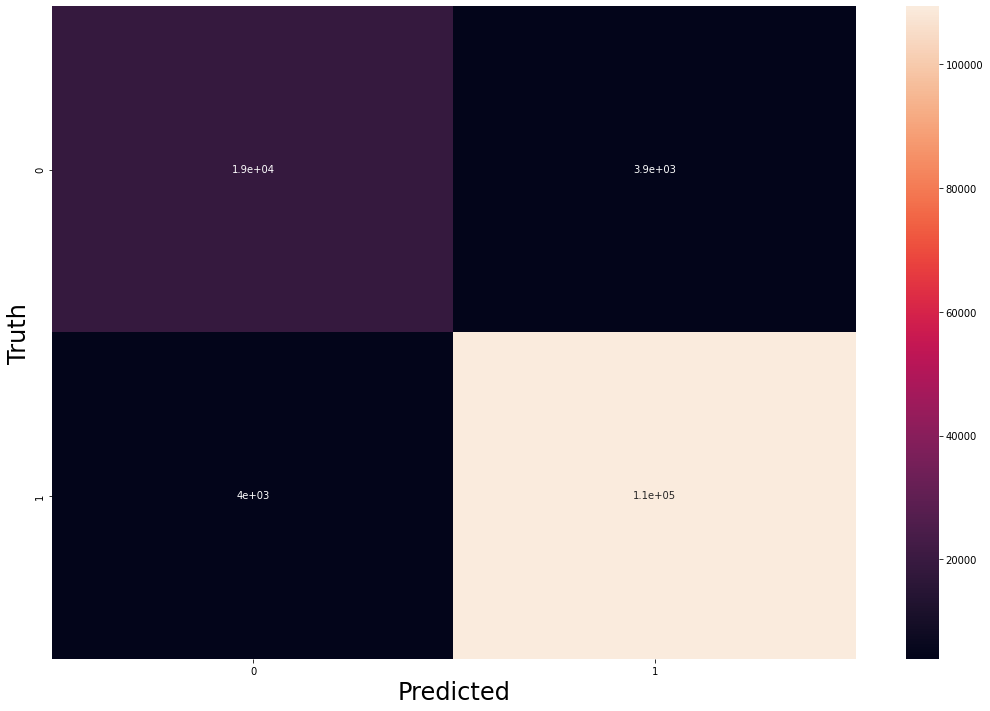

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.61      0.39      0.48     22765
           1       0.89      0.95      0.92    113318

    accuracy                           0.86    136083
   macro avg       0.75      0.67      0.70    136083
weighted avg       0.84      0.86      0.84    136083

False positive rate FPR: 0.38639642734455515
False negative rate FNR: 0.11383384898953328
FAR: 0.2501151381670442
Accuracy: 0.8570137342651176


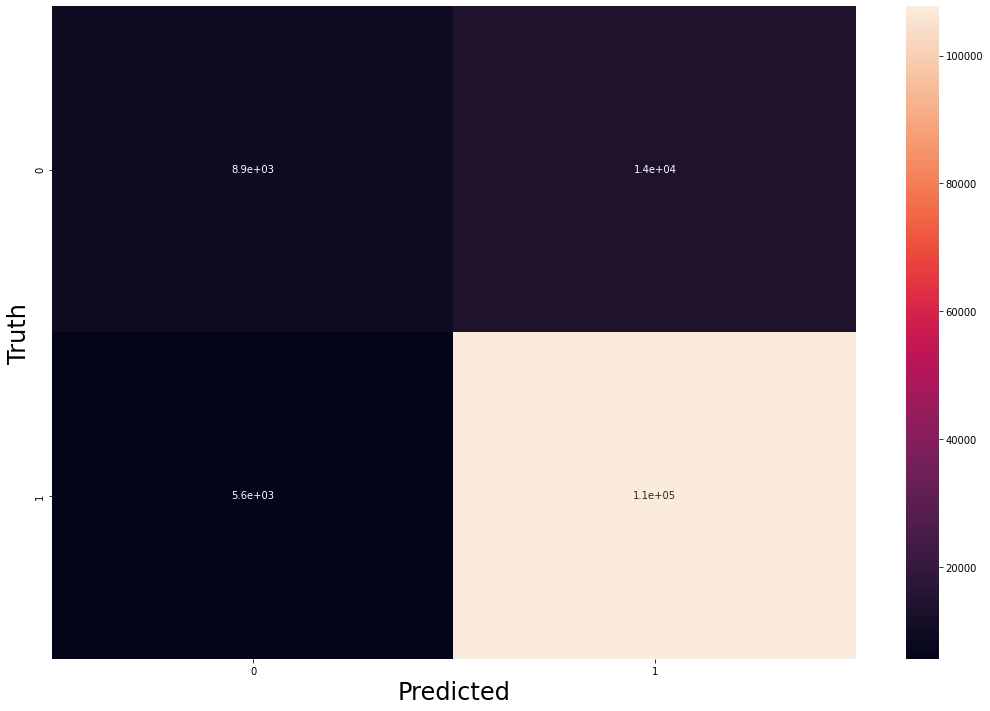

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
#get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [ ]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9579 (+/- 0.00)
[0.95771698 0.95693437 0.9581138  0.95919402 0.95776107]


In [ ]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9579 (+/- 0.00)
[0.95778312 0.95694539 0.95810278 0.95900664 0.95786028]


## Retrieve Model

In [ ]:
"""import pickle

filename = 'model.sav'
pickle.dump(model, open(filename,'wb'))


loaded_model = pickle.load(open(filename,'rb'))"""